*Question:*

The rate coefficient for isomerization reaction of cyclopropane to propane was measure at five temperatures, as given in the table below. Determine the Arrhenius coefficent and activation energy, and comment on their values.

| $T (\mathrm{K})$ | $k (\mathrm{s}^-{1})$ |
|---|---|
|$700$ | $1.5 \times 10^{-5}$|
|$750$ | $4.9 \times 10^{-4}$|
|$800$ | $5.9 \times 10^{-3}$|
|$850$ | $4.7 \times 10^{-2}$|
|$900$ | $5.5 \times 10^{-1}$|

*Solution:*

If the kinetics follow Arrhenius behavior, it should be possible to fot a plot of $y \equiv \ln{k}$ against $x \equiv 1/T$ to a straight line with the formula

$$
\ln{k} = \ln{A} - \frac{E_a}{RT}
$$

This function is linear in the parameters $a = \ln{A}$ and $b = -E_a/R$ and can be fit using Numpy's linear least squares fitting funcion, ```np.linalg.lstq```.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

# The experimental data: rate constant k (s-1) as a function of temperature, T (K)
T = np.array([700, 750, 800, 850, 900])
k = np.array([1.5e-5, 4.9e-4, 5.9e-3, 4.7e-2, 5.5e-1])

y = np.log(k)
X = np.vstack((np.ones(len(T)), 1/T)).T
ret = np.linalg.lstsq(X, y, rcond=None)
print('Fit parameters: {} \nSquared residuals: {}\nRank of X: {} \nSingular values of X: {}'.format(*ret))

Fit parameters: [    35.23538457 -32334.97480231] 
Squared residuals: [0.16337359]
Rank of X: 2 
Singular values of X: [2.23606975e+00 2.51075716e-04]


In [52]:
# Retrieve the line intercept adn gradient; convert to A and Ea
a, b = ret[0]
A, Ea = np.exp(a), -b * R /1000
print(f'A = {A:.2e} s-1')
print(f'Ea = {Ea:.0f} kJ.mol-1')

A = 2.01e+15 s-1
Ea = 269 kJ.mol-1


This activation energy is quite large since a carbon-carbon bond needs to break to open the cyclopropane ring. The pre-exponential Arrhenius factor is of the order of vibrational frequency, as expected for unimolecular reaction.

The plot the best-fit line, we can create a function, ```get_lnk```, that retuns $\ln{k}$ using the fitted values of $A$ and $E_a$ use it at two temperaturers. Below, this is compared with the experimental data, showing a decent enough fit.

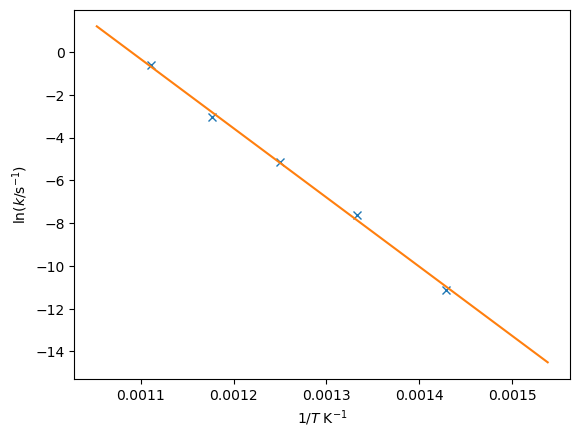

In [59]:
plt.plot(1/T, np.log(k), 'x')
T1, T2 = 650, 950
def get_lnk(T):
    return np.log(A) - Ea * 1000 / R / T

plt.plot([1/T1, 1/T2], [get_lnk(T1), get_lnk(T2)])
plt.xlabel(r'$1/T \; \mathrm{K^{-1}}$')
plt.ylabel(r'$\ln(k /\mathrm{s^{-1}})  $')
plt.show()